#USDA Food Database Analysis
This notebook is adapted from Wes Mckinley's Python for Data Analysis.

The project aims to analyze usda food database json file created by Ashley Williams, and extracted from the link: https://github.com/CJOlsen/perfect-meal-win.


We start by importing the necessary libraries and the dataset. Then we perform several operations on the dataset.


In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [5]:
!wget -O "foods-2011-10-03.json" {"https://raw.githubusercontent.com/CJOlsen/perfect-meal-win/master/foods-2011-10-03.json"}
db = (json.load(open("foods-2011-10-03.json")))
print(db[:5])
print(db[0].keys())
#created database

--2024-05-24 21:49:58--  https://raw.githubusercontent.com/CJOlsen/perfect-meal-win/master/foods-2011-10-03.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31814355 (30M) [text/plain]
Saving to: ‘foods-2011-10-03.json’

foods-2011-10-03.js 100%[===================>]  30.34M  --.-KB/s    in 0.1s    

2024-05-24 21:49:59 (210 MB/s) - ‘foods-2011-10-03.json’ saved [31814355/31814355]

[{'id': 1008, 'description': 'Cheese, caraway', 'tags': [], 'manufacturer': '', 'group': 'Dairy and Egg Products', 'portions': [{'amount': 1, 'unit': 'oz', 'grams': 28.35}], 'nutrients': [{'value': 25.18, 'units': 'g', 'description': 'Protein', 'group': 'Composition'}, {'value': 29.2, 'units': 'g', 'description': 'Total lipid (fat)', 'group': 'Composition'}, {'value': 3.06, '

Using the columns 'description', 'group', 'id', 'manufacturer', we create a dataframe. We observe the values grouped by food group.

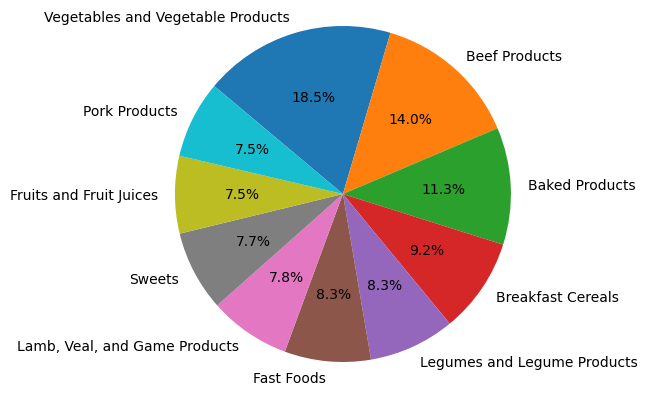

group
Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: count, dtype: int64


In [19]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = pd.DataFrame(db, columns= info_keys)
#organized database

top_10groups = pd.value_counts(info.group)[:10]
plt.pie(top_10groups, labels=top_10groups.index, autopct='%1.1f%%',  startangle=140, counterclock=False)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

print(top_10groups)

We extract nutrient data from the original dataset and organize it

In [20]:
nutrients = []

for rec in db:
    fnuts = pd.DataFrame(rec["nutrients"])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)


nutrients = pd.concat(nutrients,ignore_index=True)
nutrients.duplicated().sum()
nutrients = nutrients.drop_duplicates()
print(nutrients)


          value units                         description        group     id
0        25.180     g                             Protein  Composition   1008
1        29.200     g                   Total lipid (fat)  Composition   1008
2         3.060     g         Carbohydrate, by difference  Composition   1008
3         3.280     g                                 Ash        Other   1008
4       376.000  kcal                              Energy       Energy   1008
...         ...   ...                                 ...          ...    ...
389350    0.000   mcg                 Vitamin B-12, added     Vitamins  43546
389351    0.000    mg                         Cholesterol        Other  43546
389352    0.072     g        Fatty acids, total saturated        Other  43546
389353    0.028     g  Fatty acids, total monounsaturated        Other  43546
389354    0.041     g  Fatty acids, total polyunsaturated        Other  43546

[375176 rows x 5 columns]


We then adjust column names in the two dataframes and merge them, and observe how the related information can be plotted.

In [21]:
col_mapping = {"description":"food",
                "group":"fgroup"}

info = info.rename(columns=col_mapping, copy=False)
#column names changed

col_mapping = {"description":"nutrient",
                "group":"nutgroup"}

nutrient = nutrients.rename(columns=col_mapping, copy=False)
#column names changed

ndata = pd.merge(nutrients,info, on='id', how='outer')
print(ndata.iloc[30000])

value                                             0.04
units                                                g
description                                    Glycine
group                                      Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object


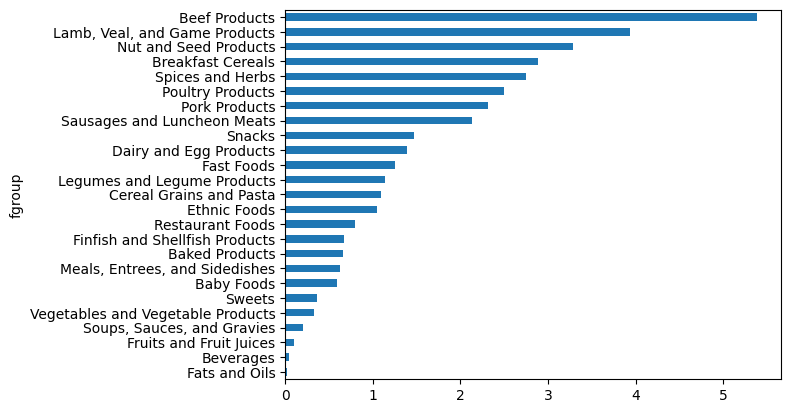

In [13]:
result = ndata.groupby(['description', 'fgroup'])['value'].quantile(0.5)

result['Zinc, Zn'].sort_values().plot(kind='barh')
plt.show()

In [14]:
by_nutrient = ndata.groupby(['group', 'description'])

get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)[['value','food']]

max_foods.food = max_foods.food.str[:50]

print(max_foods.loc['Amino Acids']['food'])


#several ways to investigate the database can get more according to what is wished to be examined

description
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolat